In [ ]:
def NMF_noisy(V, V_noisless, d, delta = 1e-9, maxiter = 1000, seed = 0):
    """
    Function to decompose matrix V, which here is an image with noise added to it, in matrices W and H, 
    with d as the number of columns in W and rows in H. For each iteration of W and H it is calculated 
    the frobenius norm between V_noisless and the matrix product W @ H. 
    input:
        V: (m,n) input array, image with added noise
        V_noisless: (m,n) inpu array, image without added noise
        d: integer, Number of components we want to decompose V into
        delta, float, small number for safe division
        maxiter: integer, maximum number of iterations
        seed: integer, random seed
    output:
        W: (m,d) array
        H: (d,n) array
        fro_norm: (maxiter) array
    """

    if seed != 0:
        np.random.seed(seed)

    # Initialize W and H as matrices with random numbers between 0 and 1
    m , n = V.shape
    W = np.random.random(size = (m, d))
    H = np.random.random(size = (d, n))
    
    # Scale initial values
    W = W * np.sqrt(V.mean()/d)
    H = H * np.sqrt(V.mean()/d)

    fro_norm = np.zeros(maxiter)

    # Update W and H
    for i in range(maxiter):
        H = H * (W.T @ V) / (W.T @ W @ H + delta)
        W = W * (V @ H.T) / (W @ H @ H.T + delta)
        fro_norm[i] = np.linalg.norm(V_noisless - W@H, ord='fro')

    return W, H, fro_norm

[]

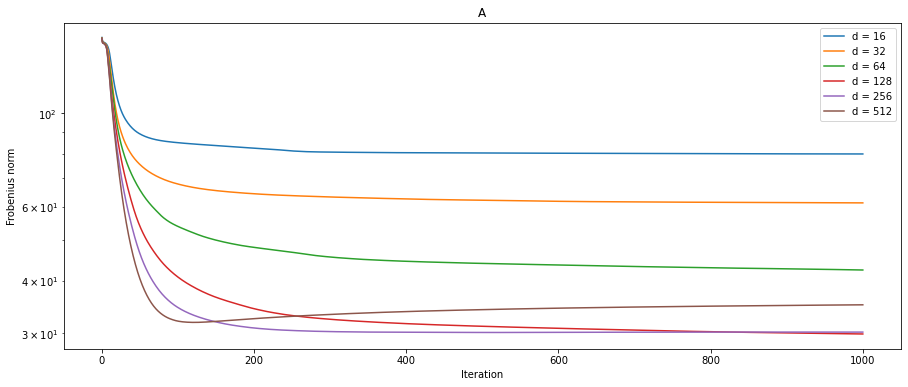

In [ ]:
noisy_faces_reshaped = noisy_faces_opacityless.reshape(np.prod(noisy_faces_opacityless.shape)//N, N)
d_list = [16,32,64, 128, 256, 512]
maxiter = 1000
iter = np.linspace(0, maxiter, maxiter)
fig, ax1 = plt.subplots(1, 1 , figsize=(15, 6))
for i in range(len(d_list)):
    d = d_list[i]
    W, H, norm_A = NMF_noisy(noisy_faces_reshaped, faces_reshaped, d, maxiter=maxiter)
    ax1.semilogy(iter, norm_A, label = f"d = {d}")
ax1.legend()
ax1.set_title('A')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Frobenius norm')
plt.plot()